In [1]:
from datetime import datetime
from time import time
import sys

sys.path.insert(0, '/home/ading/dev/empirical-mt')

import tensorflow as tf

from visual_tracking.model.mt_feature_decoder import MTFeatureDecoder
from visual_tracking.utils.alov300_input_pip_deprecated import SpeedDirectionInputFunc
from visual_tracking.utils.est_contrast_flow_input_pip import EstimatorOpticFlowInputFunc

TRAIN_DATASET_DIR = '../data/alov300++/pairwise_train_frac1_size76_ratio0.5_grayscale'  # TODO make this an input
EVAL_DATASET_DIR = '../data/alov300++/pairwise_test_frac1_size76_ratio0.5_grayscale'

Using TensorFlow backend.


In [2]:
input_fn_eval = SpeedDirectionInputFunc(dataset_dir=EVAL_DATASET_DIR, num_epochs=1)

timestamp = datetime.fromtimestamp(time()).strftime('%m-%d-%H-%M-%S')
model_dir = '../models_tmp2/alov300/06-22-16-44-59'

model_fn = MTFeatureDecoder(mt_params_path='../params_MT_654.pkl')

m = tf.estimator.Estimator(model_fn, model_dir=model_dir)

   
p = m.predict(input_fn=input_fn_eval)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdafc167f10>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '../models_tmp2/alov300/06-22-16-44-59', '_save_summary_steps': 100}


In [3]:
p = list(p)

intput pipline initilized, input_shpae=({'direction': TensorShape([Dimension(None), Dimension(76), Dimension(76)]), 'frame': TensorShape([Dimension(None), Dimension(76), Dimension(76), Dimension(1)]), 'contrast': TensorShape([Dimension(None), Dimension(76), Dimension(76)]), 'prev_frame': TensorShape([Dimension(None), Dimension(76), Dimension(76), Dimension(1)]), 'speed': TensorShape([Dimension(None), Dimension(76), Dimension(76)]), 'prev_bbox': TensorShape([Dimension(None), Dimension(2), Dimension(2)])}, TensorShape([Dimension(None), Dimension(2), Dimension(2)])), input_dtype=({'direction': tf.float32, 'frame': tf.float32, 'contrast': tf.float32, 'prev_frame': tf.float32, 'speed': tf.float32, 'prev_bbox': tf.float32}, tf.float32)
INFO:tensorflow:Restoring parameters from ../models_tmp2/alov300/06-22-16-44-59/model.ckpt-3864


/home/ading/.local/lib/python2.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


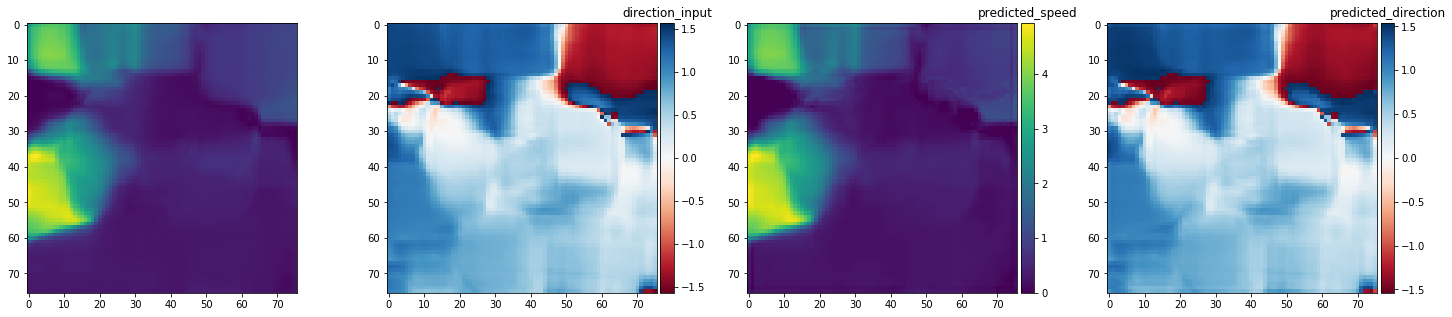

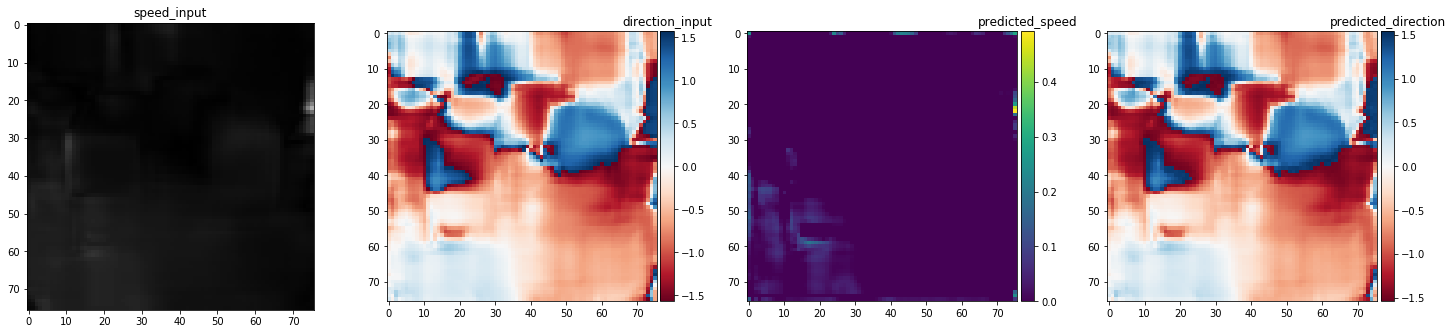

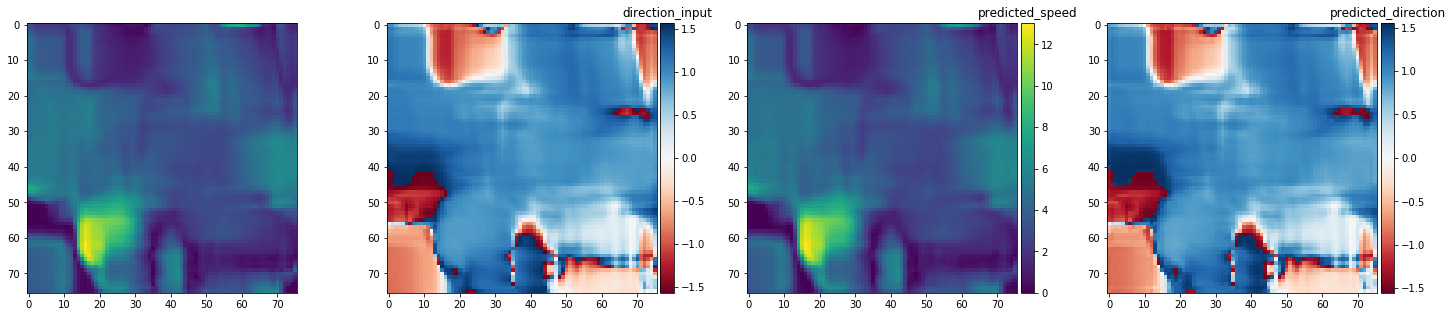

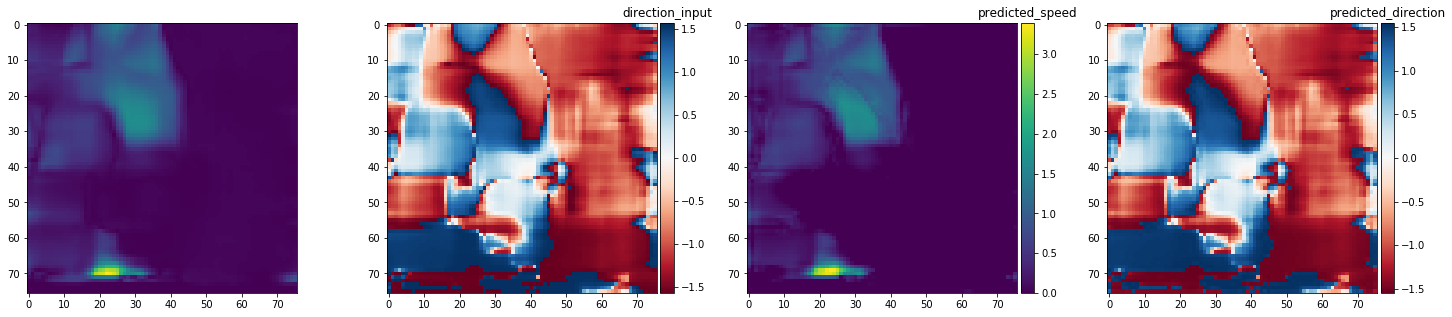

In [23]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

r = 1
c = 4


for i in range(0,4):
    
    
    plt.figure(figsize=(20, 20))
    plt.subplot(r, c, 1)
    io.imshow(p[i]['input_speed'])
    plt.title('speed_input')
    
    plt.subplot(r, c, 2)
    io.imshow(p[i]['input_direction'])
    plt.title('direction_input')
    
    plt.subplot(r, c, 3)
    io.imshow(np.squeeze(p[i]['pred_speed'], axis=2))
    plt.title('predicted_speed')
    
    plt.subplot(r, c, 4)
    io.imshow(np.squeeze(p[i]['pred_direction'], axis=2))
    plt.title('predicted_direction')
    
    plt.show()
    

    

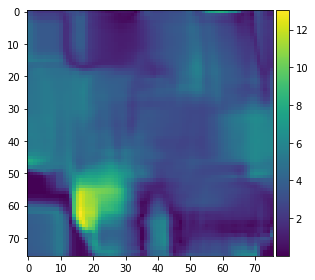

In [20]:
io.imshow(p[2]['input_speed'])